# PART A

In [14]:
print("\n\n------ RUNNING PART A ------\n\n")



------ RUNNING PART A ------




In [15]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [16]:
# Read data
fall_data = pd.read_csv('falldetection_dataset.csv', header=None)

In [17]:
# Split fall_data into features and labels
features = fall_data.drop(labels=[0, 1], axis=1)
labels = fall_data[1]

train_X = features.values
train_Y = labels.values

In [18]:
# Apply PCA
pca = PCA(n_components=2)
train_X_transformed = pca.fit_transform(train_X)
pves = pca.explained_variance_ratio_

In [19]:
for index, pve in enumerate(pves):
    print(f"Principal Component: {(index + 1)}, Variance Captured: {pve}")
print("Variance captured by top 2 PCs:", sum(pves))

Principal Component: 1, Variance Captured: 0.7530724808534623
Principal Component: 2, Variance Captured: 0.08511590067037635
Variance captured by top 2 PCs: 0.8381883815238387


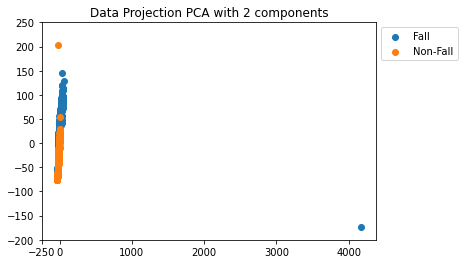

In [20]:
# Visualize data after PCA
plt.scatter(train_X_transformed[train_Y == 'F', 0], train_X_transformed[train_Y == 'F', 1], label="Fall")
plt.scatter(train_X_transformed[train_Y == 'NF', 0], train_X_transformed[train_Y == 'NF', 1], label="Non-Fall")
plt.title('Data Projection PCA with 2 components')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(ticks=[-250, 0,1000,2000,3000,4000])
plt.yticks(ticks=[-200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
plt.savefig("fig1.jpg", bbox_inches="tight")
plt.show()

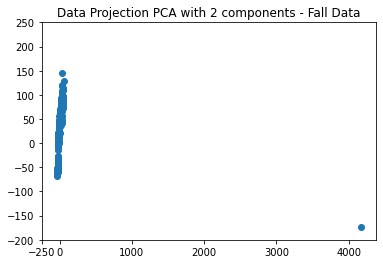

In [21]:
plt.scatter(train_X_transformed[train_Y == 'F', 0], train_X_transformed[train_Y == 'F', 1], label="Fall")
plt.title('Data Projection PCA with 2 components - Fall Data')
plt.xticks(ticks=[-250, 0,1000,2000,3000,4000])
plt.yticks(ticks=[-200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
#plt.savefig("fig2.jpg", bbox_inches="tight")
plt.show()

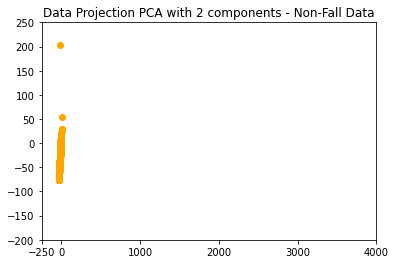

In [22]:
plt.scatter(train_X_transformed[train_Y == 'NF', 0], train_X_transformed[train_Y == 'NF', 1], label="Non-Fall", c="orange")
plt.title('Data Projection PCA with 2 components - Non-Fall Data')
plt.xticks(ticks=[-250, 0,1000,2000,3000,4000])
plt.yticks(ticks=[-200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
#plt.savefig("fig3.jpg", bbox_inches="tight")
plt.show()

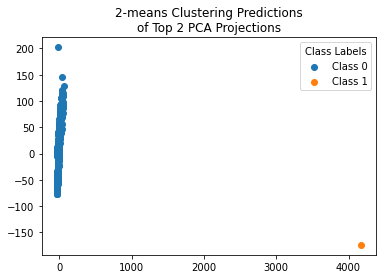

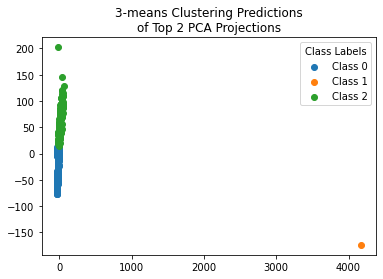

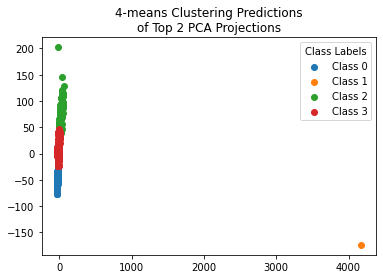

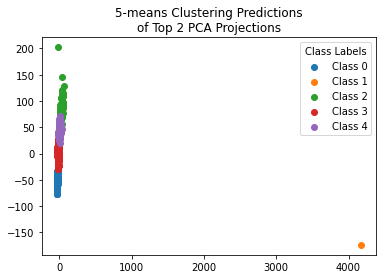

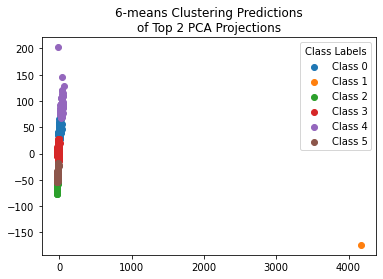

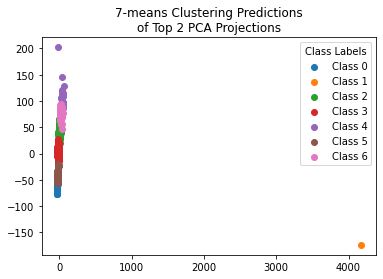

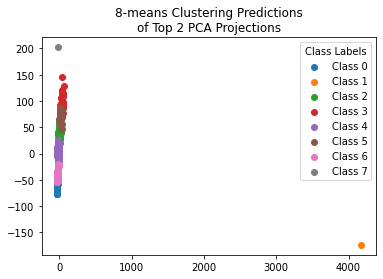

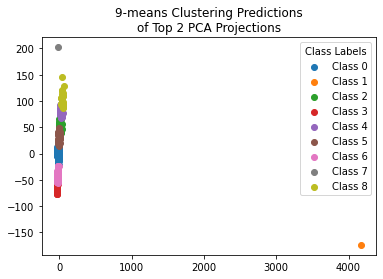

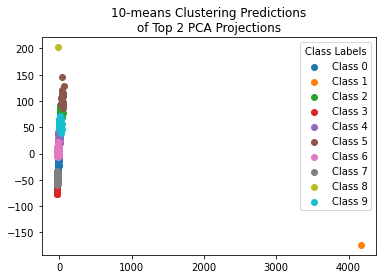

In [23]:
cluster_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for cluster_number in cluster_numbers:
    kmeans = KMeans(n_clusters=cluster_number, random_state=42)
    kmeans.fit(train_X_transformed)
    predictions = kmeans.predict(train_X_transformed)

    for label_count in range(cluster_number):
        plt.scatter(train_X_transformed[predictions == label_count, 0], train_X_transformed[predictions == label_count, 1], label=("Class " + str(label_count)))
    plt.legend(title="Class Labels")
    plt.title(str(cluster_number) + "-means Clustering Predictions\nof Top 2 PCA Projections")
    #plt.savefig(f"fig-{cluster_number}.jpg", bbox_inches="tight")
    plt.show()

In [24]:
#when N=2, check the degree of percentage overlap/consistency between the cluster memberships and the action labels originally provided.
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(train_X_transformed)
predictions = kmeans.predict(train_X_transformed)
label_vals = [0 if l == "F" else 1 for l in train_Y]
acc_1 = metrics.accuracy_score(label_vals, predictions)
acc_2 = metrics.accuracy_score(label_vals, (1 - predictions))
print("Consistency with all data:", max(acc_1, acc_2))

Consistency with all data: 0.5512367491166078


In [25]:
# Remove the two outlier points
outlier_1 = max(train_X_transformed[:,1])
outlier_2 = min(train_X_transformed[:,1])

index_1 = np.where((train_X_transformed[:,1] == outlier_1) == True)[0][0]
index_2 = np.where((train_X_transformed[:,1] == outlier_2) == True)[0][0]

train_X_transformed_out = np.delete(train_X_transformed, [index_1, index_2], axis=0)
train_Y_transformed_out = np.delete(train_Y, [index_1, index_2], axis=0)

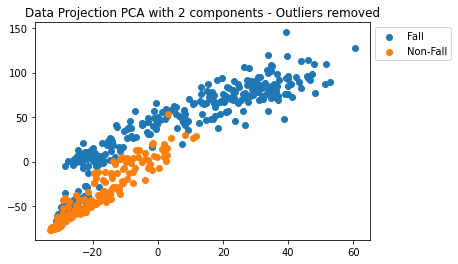

In [26]:
# Visualize data after PCA
plt.scatter(train_X_transformed_out[train_Y_transformed_out == 'F', 0], train_X_transformed_out[train_Y_transformed_out == 'F', 1], label="Fall")
plt.scatter(train_X_transformed_out[train_Y_transformed_out == 'NF', 0], train_X_transformed_out[train_Y_transformed_out == 'NF', 1], label="Non-Fall")
plt.title('Data Projection PCA with 2 components - Outliers removed')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
#plt.savefig("fig5.jpg", bbox_inches="tight")
plt.show()

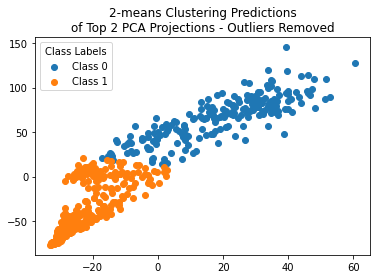

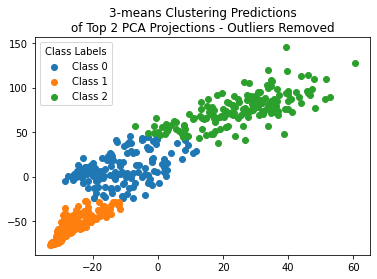

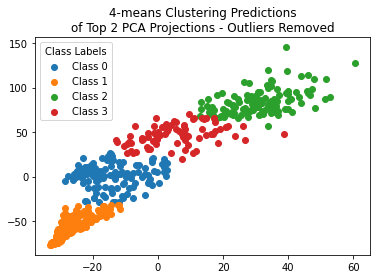

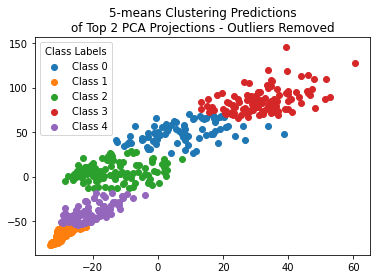

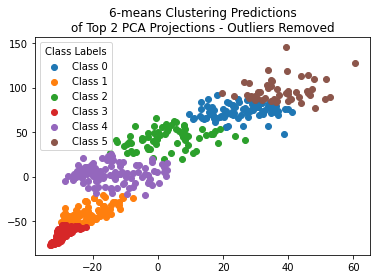

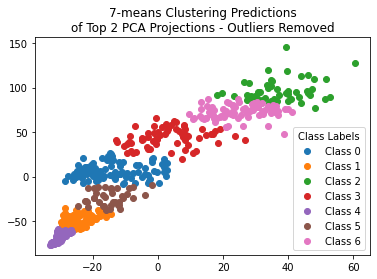

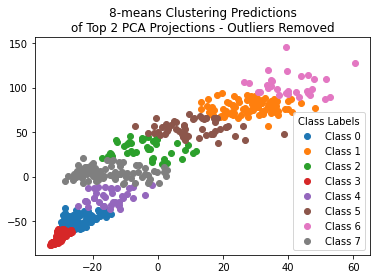

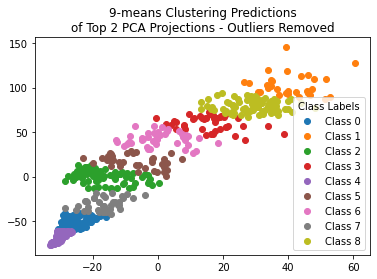

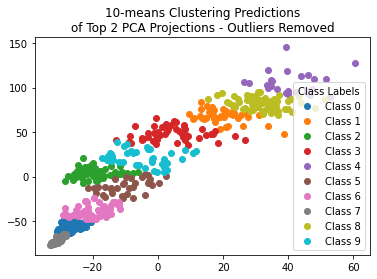

In [27]:
cluster_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for cluster_number in cluster_numbers:
    kmeans = KMeans(n_clusters=cluster_number, random_state=42)
    kmeans.fit(train_X_transformed_out)
    predictions = kmeans.predict(train_X_transformed_out)

    for label_count in range(cluster_number):
        plt.scatter(train_X_transformed_out[predictions == label_count, 0], train_X_transformed_out[predictions == label_count, 1], label=("Class " + str(label_count)))
    plt.legend(title="Class Labels")
    plt.title(str(cluster_number) + "-means Clustering Predictions\nof Top 2 PCA Projections - Outliers Removed")
    #plt.savefig(f"fig--{cluster_number}.jpg", bbox_inches="tight")
    plt.show()

# PART B

In [28]:
print("\n\n------ RUNNING PART B ------\n\n")



------ RUNNING PART B ------




In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd

In [30]:
train_X_, test_X_, train_Y_, test_Y_ = train_test_split(train_X, train_Y, test_size=0.30, random_state=42)
valid_X_, test_X_, valid_Y_, test_Y_ = train_test_split(test_X_, test_Y_, test_size=0.50, random_state=42)

## SVM

In [31]:
c_values = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_types = ["linear", "poly", "rbf", "sigmoid"]
degrees = [1, 2, 3, 4, 5]
gamma_values = ['scale', 'auto']

In [32]:
results_SVM = []
row_data = dict()
for c_value in c_values:
    for kernel_type in kernel_types:
        
        if kernel_type == "linear":
            model = SVC(C = c_value, kernel=kernel_type, max_iter=10000,random_state = 42)
            model.fit(train_X_, train_Y_)
            prediction = model.predict(valid_X_)
            accuracy = metrics.accuracy_score(valid_Y_, prediction)
            
            row_data = {'Regularization Parameter': c_value,
                            'Kernel Type': kernel_type,
                            'Degree': "",
                            'Kernel Coefficient': "",
                            'Validation Accuracy': accuracy}
            results_SVM.append(row_data)
            print(row_data)

        else:
            for gamma_value in gamma_values:

                if kernel_type == "poly":
                    
                    for degree in degrees:
                        model = SVC(C = c_value, kernel=kernel_type, degree=degree, gamma=gamma_value, max_iter=10000,random_state = 42)
                        model.fit(train_X_, train_Y_)
                        prediction = model.predict(valid_X_)
                        accuracy = metrics.accuracy_score(valid_Y_, prediction)

                        row_data = {'Regularization Parameter': c_value,
                            'Kernel Type': kernel_type,
                            'Degree': degree,
                            'Kernel Coefficient': gamma_value,
                            'Validation Accuracy': accuracy}
                        results_SVM.append(row_data)
                        print(row_data)
                else:
                    model = SVC(C = c_value, kernel=kernel_type, gamma=gamma_value, max_iter=10000,random_state = 42)
                    model.fit(train_X_, train_Y_)
                    prediction = model.predict(valid_X_)
                    accuracy = metrics.accuracy_score(valid_Y_, prediction)

                    row_data = {'Regularization Parameter': c_value,
                        'Kernel Type': kernel_type,
                        'Degree': "",
                        'Kernel Coefficient': gamma_value,
                        'Validation Accuracy': accuracy}
                    results_SVM.append(row_data)
                    print(row_data)

{'Regularization Parameter': 0.001, 'Kernel Type': 'linear', 'Degree': '', 'Kernel Coefficient': '', 'Validation Accuracy': 0.9764705882352941}
{'Regularization Parameter': 0.001, 'Kernel Type': 'poly', 'Degree': 1, 'Kernel Coefficient': 'scale', 'Validation Accuracy': 0.5882352941176471}
{'Regularization Parameter': 0.001, 'Kernel Type': 'poly', 'Degree': 2, 'Kernel Coefficient': 'scale', 'Validation Accuracy': 0.5882352941176471}
{'Regularization Parameter': 0.001, 'Kernel Type': 'poly', 'Degree': 3, 'Kernel Coefficient': 'scale', 'Validation Accuracy': 0.5882352941176471}
{'Regularization Parameter': 0.001, 'Kernel Type': 'poly', 'Degree': 4, 'Kernel Coefficient': 'scale', 'Validation Accuracy': 0.5882352941176471}
{'Regularization Parameter': 0.001, 'Kernel Type': 'poly', 'Degree': 5, 'Kernel Coefficient': 'scale', 'Validation Accuracy': 0.5882352941176471}
{'Regularization Parameter': 0.001, 'Kernel Type': 'poly', 'Degree': 1, 'Kernel Coefficient': 'auto', 'Validation Accuracy': 0

In [33]:
sorted_results_SVM = sorted(results_SVM, key=lambda x: x['Validation Accuracy'], reverse=True)
SVM_data = pd.DataFrame(sorted_results_SVM)

In [34]:
writer = pd.ExcelWriter('SVM_data.xlsx')
SVM_data.to_excel(writer, 'Sheet1', index=False)
writer.save()
print('SVM_data is written to Excel File successfully.')

SVM_data is written to Excel File successfully.


In [35]:
best_SVM_params = sorted_results_SVM[0]
c_value = best_SVM_params['Regularization Parameter']
kernel_type = best_SVM_params['Kernel Type']
degree = best_SVM_params['Degree']
gamma_value = best_SVM_params['Kernel Coefficient']
val_acc = best_SVM_params['Validation Accuracy']

print("--- Best SVM model is ---")
print("Regularization Parameter:", c_value)
print("Kernel Type:", kernel_type)
print("Degree:", degree)
print("Kernel Coefficient:", gamma_value)
print("Validation Accuracy:", val_acc)

--- Best SVM model is ---
Regularization Parameter: 0.001
Kernel Type: poly
Degree: 4
Kernel Coefficient: auto
Validation Accuracy: 1.0


In [36]:
best_SVM_model = SVC(C=c_value, kernel=kernel_type, degree=degree, gamma=gamma_value, max_iter=10000, random_state=42)
best_SVM_model.fit(train_X_, train_Y_)
prediction = best_SVM_model.predict(test_X_)
accuracy = metrics.accuracy_score(test_Y_, prediction)
print("Accuracy of the best SVM model on test data:", accuracy)

Accuracy of the best SVM model on test data: 1.0


## MLP

In [37]:
hidden_layer_sizes = [(8,8), (16,16), (32,32), (64,64)]
activation_functions = ["logistic", "tanh", "relu"]
solvers = ["sgd", "adam"]
alphas = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
learning_rates = [1e-3, 1e-2, 1e-1]

In [38]:
results_MLP = []

for hidden_layer_size in hidden_layer_sizes:
    for activation_function in activation_functions:
        for solver in solvers:
            for alpha in alphas:
                for learning_rate in learning_rates:

                    model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation_function, solver=solver, alpha=alpha, learning_rate_init=learning_rate, max_iter=5000, random_state=42)
                    model.fit(train_X_, train_Y_)
                    prediction = model.predict(valid_X_)
                    accuracy = metrics.accuracy_score(valid_Y_, prediction)
                    row_data = dict()
                    row_data = {"Hidden Layer Size": hidden_layer_size,
                    "Activation Function": activation_function,
                    "Solver": solver,
                    "Alpha": alpha,
                    "Learning Rate": learning_rate,
                    "Validation Accuracy": accuracy}

                    results_MLP.append(row_data)
                    print(row_data)

{'Hidden Layer Size': (8, 8), 'Activation Function': 'logistic', 'Solver': 'sgd', 'Alpha': 0.001, 'Learning Rate': 0.001, 'Validation Accuracy': 0.9882352941176471}
{'Hidden Layer Size': (8, 8), 'Activation Function': 'logistic', 'Solver': 'sgd', 'Alpha': 0.001, 'Learning Rate': 0.01, 'Validation Accuracy': 0.9882352941176471}
{'Hidden Layer Size': (8, 8), 'Activation Function': 'logistic', 'Solver': 'sgd', 'Alpha': 0.001, 'Learning Rate': 0.1, 'Validation Accuracy': 0.9882352941176471}
{'Hidden Layer Size': (8, 8), 'Activation Function': 'logistic', 'Solver': 'sgd', 'Alpha': 0.01, 'Learning Rate': 0.001, 'Validation Accuracy': 0.9882352941176471}
{'Hidden Layer Size': (8, 8), 'Activation Function': 'logistic', 'Solver': 'sgd', 'Alpha': 0.01, 'Learning Rate': 0.01, 'Validation Accuracy': 0.9882352941176471}
{'Hidden Layer Size': (8, 8), 'Activation Function': 'logistic', 'Solver': 'sgd', 'Alpha': 0.01, 'Learning Rate': 0.1, 'Validation Accuracy': 0.9882352941176471}
{'Hidden Layer Size

In [39]:
sorted_results_MLP = sorted(results_MLP, key=lambda x: x['Validation Accuracy'], reverse=True)
MLP_data = pd.DataFrame(sorted_results_MLP)

In [40]:
writer = pd.ExcelWriter('MLP_data.xlsx')
MLP_data.to_excel(writer, 'Sheet1', index=False)
writer.save()
print('MLP_data is written to Excel File successfully.')

MLP_data is written to Excel File successfully.


In [41]:
best_MLP_params = sorted_results_MLP[18]
hidden_layer_size = best_MLP_params['Hidden Layer Size']
activation_function = best_MLP_params['Activation Function']
solver = best_MLP_params['Solver']
alpha = best_MLP_params['Alpha']
learning_rate = best_MLP_params['Learning Rate']
val_acc = best_MLP_params['Validation Accuracy']

print("--- Best MLP model is ---")
print("Hidden Layer Size:", hidden_layer_size)
print("Activation Function:", activation_function)
print("Solver:", solver)
print("Alpha:", alpha)
print("Learning Rate:", learning_rate)
print("Validation Accuracy:", val_acc)

--- Best MLP model is ---
Hidden Layer Size: (64, 64)
Activation Function: relu
Solver: sgd
Alpha: 0.001
Learning Rate: 0.001
Validation Accuracy: 1.0


In [42]:
best_MLP_model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation_function, solver=solver, alpha=alpha, learning_rate_init=learning_rate,max_iter=2000, random_state=42)
best_MLP_model.fit(train_X_, train_Y_)
prediction = best_MLP_model.predict(test_X_)
accuracy = metrics.accuracy_score(test_Y_, prediction)
print("Accuracy of the best MLP model on test data:", accuracy)

Accuracy of the best MLP model on test data: 1.0
